### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

**Use:** Python code in one module gains access to the code in another module by the process of importing it. ... The import statement combines two operations; it searches for the named module, then it binds the results of that search to a name in the local scope.

### Reading Data Set

In [ ]:
# Load the datasets
crime_data_path = "Part_1_Crime_Data.csv"
vacant_notices_path = "Vacant_Building_Notices.csv"
gun_offenders_path = "Gun_Offenders_Registry.csv"
vacant_rehabs_path = "Vacant_Building_Rehabs.csv"

In [ ]:
# Reading the files
crime_data = pd.read_csv(crime_data_path)
vacant_notices = pd.read_csv(vacant_notices_path)
gun_offenders = pd.read_csv(gun_offenders_path)
vacant_rehabs = pd.read_csv(vacant_rehabs_path)

<ipython-input-3-18d107b0d403>:2: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv(crime_data_path)


We can utilize a combination of statistical analysis and data visualization to investigate the relationship between different factors and crime rates in certain neighborhoods and citywide, as identified in your previous study. Now let's look at these datasets:

1. The main dataset concentrating on crime statistics is [`Part_1_Crime_Data.csv`](https://bpdgis.maps.arcgis.com/apps/dashboards/511ba81db3414df3bb474749b69bc258).
2. [`Vacant_Building_Notices.csv`](https://arcg.is/1TCH0D): To determine whether crime rates and vacant buildings are correlated.
3. [`Gun_Offenders_Registry.csv`](https://arcg.is/1K9fDH): To investigate how crime rates are affected by offenses involving firearms.
4. [`Vacant_Building_Rehabs.csv`](https://arcg.is/yvWeb): To determine whether crime rates are impacted by renovated structures.

We hypothesize that there may be positive or negative connections between these variables and crime rates. To ascertain whether there is a noteworthy influence and whether the outcomes are consistent with the factors, we'll investigate each factor's relationship to the crime statistics.





###Displaying Dataset

In [ ]:
# Displaying the first few rows and the structure of each dataset
crime_data.head()

,X,Y,RowID,CCNumber,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,Post,...,Ethnicity,Location,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents
0,-76.584281,39.282869,1,12A01562,2011/12/30 09:37:00+00,6E,LARCENY,I,NaN,214,...,NaN,2300 BOSTON ST,SOUTHEAST,NaN,CANTON,39.282869,-76.584281,"(39.282869,-76.584281)",GARAGE ON PRIV. PROP,1
1,-76.570626,39.367758,2,11L12669,2011/12/30 00:36:00+00,3JF,ROBBERY,I,FIREARM,423,...,NaN,6600 MOONFLOWER CT,NORTHEAST,NaN,HAMILTON HILLS,39.367758,-76.570626,"(39.367758,-76.570626)",ROW/TOWNHOUSE-OCC,1
2,-76.562701,39.323386,3,11L13076,2011/12/30 21:00:00+00,3AO,ROBBERY,O,OTHER,432,...,NaN,3400 SHANNON DR,NORTHEAST,NaN,BELAIR-EDISON,39.323386,-76.562701,"(39.323386,-76.562701)",ALLEY,1
3,-76.602909,39.232993,4,12A00628,2011/12/30 09:00:00+00,5A,BURGLARY,I,NaN,913,...,NaN,600 E JEFFREY ST,SOUTHERN,NaN,BROOKLYN,39.232993,-76.602909,"(39.232993,-76.602909)",ROW/TOWNHOUSE-OCC,1
4,-76.576114,39.292284,5,11L13140,2011/12/30 00:13:00+00,4C,AGG. ASSAULT,O,OTHER,222,...,NaN,2900 E BALTIMORE ST,SOUTHEAST,NaN,PATTERSON PARK NEIGHBORHOOD,39.292284,-76.576114,"(39.292284,-76.576114)",STREET,1


1. Crime Data (`Part_1_Crime_Data.csv`)
- **Entries:** 587,673
- **Key Columns:** 'CrimeDateTime', 'CrimeCode', 'Description', 'Inside_Outside', 'Weapon', 'Neighborhood', 'Latitude', 'Longitude'
- **Purpose:** This dataset will be used to analyze the crime rates in various neighborhoods.

In [ ]:
vacant_notices.head()

,X,Y,OBJECTID,NoticeNum,DateNotice,DateCancel,DateAbate,NT,OWNER_ABBR,HousingMarketTypology2017,Council_District,Neighborhood,BLOCKLOT,Address
0,1.411074e+06,598468.355480,723192,805231A,2012/01/25 15:37:00+00,NaN,NaN,Vacant,NaN,I,7,EASTERWOOD,0001 003,2041 W NORTH AVE
1,1.411088e+06,598469.087434,723193,1780434A,2019/04/20 08:55:00+00,NaN,NaN,Vacant,NaN,I,7,EASTERWOOD,0001 004,2039 W NORTH AVE
2,1.411131e+06,598471.043467,723196,927919A,2013/02/01 14:19:00+00,NaN,NaN,Vacant,NaN,I,7,EASTERWOOD,0001 007,2033 W NORTH AVE
3,1.411144e+06,598471.677324,723197,2106499A,2022/05/13 16:20:00+00,NaN,NaN,Vacant,NaN,I,7,EASTERWOOD,0001 008,2031 W NORTH AVE
4,1.411214e+06,598474.912882,723202,2078873A,2022/02/10 16:01:00+00,NaN,NaN,Vacant,NaN,I,7,EASTERWOOD,0001 013,2021 W NORTH AVE


2. Vacant Building Notices (`Vacant_Building_Notices.csv`)
- **Entries:** 13,586
- **Key Columns:** 'NoticeNum', 'Neighborhood', 'DateIssued'
- **Purpose:** To explore if there's a correlation between the issuance of vacant building notices and crime rates.

In [ ]:
gun_offenders.head()

,X,Y,RowID,CaseNumber,CreatedDate,ModifiedDate,LastName,FirstName,MiddleName,DateOfBirth,...,City,State,ZipCode,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,GlobalID
0,1.407179e+06,599063.663408,1,23-0399,2023/06/09 00:00:00+00,2023/06/09 00:00:00+00,Bullock,Aniyja,NaN,2002/05/10 00:00:00+00,...,Baltimore,Md,21216.0,Western,731.0,Walbrook,39.3111,-76.6648,"(39.3111,-76.6648)",1bce1b2f-22bd-45b1-94a1-ab84c5e96c4f
1,NaN,NaN,2,23-0398,2023/06/09 00:00:00+00,2023/06/09 00:00:00+00,Harper,Kamonte,Kaireem,1975/09/10 00:00:00+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(,)",576f2d18-d902-4547-adbf-55415ccf1835
2,1.406444e+06,598951.702849,3,23-0397,2023/06/08 00:00:00+00,2023/06/08 00:00:00+00,Mason,Duwan,Lamont,1998/06/11 00:00:00+00,...,Baltimore,Md,21216.0,Southwest,811.0,Walbrook,39.3108,-76.6674,"(39.3108,-76.6674)",de5cae18-b61e-4115-bd9e-72c90ca88360
3,1.402451e+06,591907.706139,4,23-0396,2023/06/08 00:00:00+00,2023/06/08 00:00:00+00,Edison,Malik,NaN,1998/06/13 00:00:00+00,...,Baltimore,Md,21229.0,Southwest,824.0,Allendale,39.2915,-76.6816,"(39.2915,-76.6816)",c44d98df-a356-4bda-af04-9ea9b31e18eb
4,NaN,NaN,5,23-0395,2023/06/08 00:00:00+00,2023/06/08 00:00:00+00,Johnson,Kristopher,NaN,1988/03/20 00:00:00+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(,)",69a4c17a-867f-40fe-99bb-1109d6146c8f


3. Gun Offenders Registry (`Gun_Offenders_Registry.csv`)
- **Entries:** 2,462
- **Key Columns:** 'FirstName', 'LastName', 'Age', 'Race', 'Gender', 'Neighborhood'
- **Purpose:** To examine the impact of gun-related offenses on crime rates.

In [ ]:
vacant_rehabs.head()

,X,Y,OBJECTID,Block,Lot,PermitNum,VBN,DateIssue,DateIssued,ExistingUse,ProposedUse,HousingMarketTypology2017,Council_District,Neighborhood,BLOCKLOT,Address,GlobalID
0,-8.532738e+06,4.766092e+06,1,0001,006,USE2022-52301,Y,2023/01/05 08:30:02+00,Jan 5 2023 8,3-42,3-50,I,7,EASTERWOOD,0001 006,2035 W NORTH AVE,ef8bf022-fa79-45ac-83a6-5c0ae2259544
1,-8.532650e+06,4.766018e+06,2,0001,029,USE2017-54344,Y,2018/01/03 13:30:02+00,Jan 3 2018 1,1-08,1-08,I,7,EASTERWOOD,0001 029,1804 N PAYSON ST,21b41e06-3515-49ed-90a4-bf826c07bd60
2,-8.532751e+06,4.766024e+06,3,0001,038,USE2019-55516,Y,2019/11/13 15:00:29+00,Nov 13 2019 3,1-08,1-08,I,7,EASTERWOOD,0001 038,1809 N PULASKI ST,dd1b140b-b0e4-472e-9ac3-64017543589b
3,-8.532454e+06,4.766108e+06,4,0002,016,USE2020-51648,Y,2020/06/16 07:30:21+00,Jun 16 2020 7,1-08,1-08,I,7,EASTERWOOD,0002 016,1903 W NORTH AVE,50c461ef-2804-4696-9d9c-2e5b9334bbd7
4,-8.532460e+06,4.766108e+06,5,0002,017,USE2017-54634,Y,2018/05/03 13:30:01+00,May 3 2018 1,1-08,1-08,I,7,EASTERWOOD,0002 017,1905 W NORTH AVE,1f9350b7-f4ee-4865-b564-2a29b27b1276


 4. Vacant Building Rehabs (`Vacant_Building_Rehabs.csv`)
- **Entries:** 10,090
- **Key Columns:** 'PermitNum', 'Neighborhood', 'DateIssued', 'ExistingUse', 'ProposedUse'
- **Purpose:** To understand if rehabilitated buildings affect crime rates.

###Data Cleaning

 The next steps will involve cleaning these datasets and preparing them for analysis. We'll need to ensure the data is in a consistent format, especially the date and neighborhood fields, to facilitate comparisons across datasets. Once the data is prepared, we can proceed with correlational analysis and other statistical methods to explore the relationships between these factors and crime rates.

 Our primary goals in this phase will be:

-  **Standardizing Date Formats:** Ensure that the date fields across all datasets are in a consistent format for ease of comparison.

-  **Aligning Neighborhood Names:** Make sure the neighborhood names are consistent across datasets to accurately match and compare data.

- **Handling Missing Values:** Decide how to deal with any missing or null values in key columns.

- **Extracting Relevant Columns:** Focus on the columns that are pertinent to our analysis.


In [ ]:
# Data Cleaning and Preparation

# Standardizing Date Formats for crime_data
# Converting 'CrimeDateTime' to datetime format
crime_data['CrimeDateTime'] = pd.to_datetime(crime_data['CrimeDateTime'], errors='coerce')

# Handling missing values in 'Neighborhood'
# We will fill missing values with a placeholder 'Unknown'
crime_data['Neighborhood'] = crime_data['Neighborhood'].fillna('Unknown')

# Checking the first few rows to confirm changes
crime_data_cleaned = crime_data[['CrimeDateTime', 'Neighborhood', 'Description']].head()

crime_data_cleaned

,CrimeDateTime,Neighborhood,Description
0,2011-12-30 09:37:00+00:00,CANTON,LARCENY
1,2011-12-30 00:36:00+00:00,HAMILTON HILLS,ROBBERY
2,2011-12-30 21:00:00+00:00,BELAIR-EDISON,ROBBERY
3,2011-12-30 09:00:00+00:00,BROOKLYN,BURGLARY
4,2011-12-30 00:13:00+00:00,PATTERSON PARK NEIGHBORHOOD,AGG. ASSAULT


In [ ]:
# Cleaning Vacant Building Notices dataset using 'DateNotice' column
vacant_notices['DateNotice'] = pd.to_datetime(vacant_notices['DateNotice'], errors='coerce')
vacant_notices['Neighborhood'] = vacant_notices['Neighborhood'].str.strip()  # Removing leading/trailing spaces

# Cleaning the Gun Offenders Registry dataset
# We need to check the columns first to identify the date column
gun_offenders_columns = gun_offenders.columns

# Cleaning the Vacant Building Rehabs dataset
# We'll also need to check its columns to identify the correct date column
vacant_rehabs_columns = vacant_rehabs.columns

(gun_offenders_columns, vacant_rehabs_columns, vacant_notices[['DateNotice', 'Neighborhood']].head())

(Index(['X', 'Y', 'RowID', 'CaseNumber', 'CreatedDate', 'ModifiedDate',
        'LastName', 'FirstName', 'MiddleName', 'DateOfBirth', 'Gender', 'Race',
        'FullAddress', 'City', 'State', 'ZipCode', 'District', 'Post',
        'Neighborhood', 'Latitude', 'Longitude', 'GeoLocation', 'GlobalID'],
       dtype='object'),
 Index(['X', 'Y', 'OBJECTID', 'Block', 'Lot', 'PermitNum', 'VBN', 'DateIssue',
        'DateIssued', 'ExistingUse', 'ProposedUse', 'HousingMarketTypology2017',
        'Council_District', 'Neighborhood', 'BLOCKLOT', 'Address', 'GlobalID'],
       dtype='object'),
                  DateNotice Neighborhood
 0 2012-01-25 15:37:00+00:00   EASTERWOOD
 1 2019-04-20 08:55:00+00:00   EASTERWOOD
 2 2013-02-01 14:19:00+00:00   EASTERWOOD
 3 2022-05-13 16:20:00+00:00   EASTERWOOD
 4 2022-02-10 16:01:00+00:00   EASTERWOOD)

In [ ]:
# Cleaning Gun Offenders Registry dataset
gun_offenders['CreatedDate'] = pd.to_datetime(gun_offenders['CreatedDate'], errors='coerce')
gun_offenders['Neighborhood'] = gun_offenders['Neighborhood'].str.strip()  # Removing leading/trailing spaces

# Cleaning Vacant Building Rehabs dataset
vacant_rehabs['DateIssued'] = pd.to_datetime(vacant_rehabs['DateIssued'], errors='coerce')
vacant_rehabs['Neighborhood'] = vacant_rehabs['Neighborhood'].str.strip()  # Removing leading/trailing spaces

# Checking the first few rows to confirm changes
gun_offenders_cleaned = gun_offenders[['CreatedDate', 'Neighborhood']].head()
vacant_rehabs_cleaned = vacant_rehabs[['DateIssued', 'Neighborhood']].head()

(gun_offenders_cleaned, vacant_rehabs_cleaned)

(                CreatedDate Neighborhood
 0 2023-06-09 00:00:00+00:00     Walbrook
 1 2023-06-09 00:00:00+00:00          NaN
 2 2023-06-08 00:00:00+00:00     Walbrook
 3 2023-06-08 00:00:00+00:00    Allendale
 4 2023-06-08 00:00:00+00:00          NaN,
   DateIssued Neighborhood
 0        NaT   EASTERWOOD
 1        NaT   EASTERWOOD
 2        NaT   EASTERWOOD
 3        NaT   EASTERWOOD
 4        NaT   EASTERWOOD)

###1) Summarized counts by neighborhood for the years 2017 and 2022

In [ ]:
# Summarizing counts by neighborhood for 2017 and 2022 for each dataset

# Function to filter data for a specific year and summarize by neighborhood
def summarize_by_neighborhood(df, date_column, year):
    df_filtered = df[df[date_column].dt.year == year]
    summary = df_filtered['Neighborhood'].value_counts().reset_index()
    summary.columns = ['Neighborhood', f'Count_{year}']
    return summary

# Summarizing for Crime Data
crime_data_2017 = summarize_by_neighborhood(crime_data, 'CrimeDateTime', 2017)
crime_data_2022 = summarize_by_neighborhood(crime_data, 'CrimeDateTime', 2022)

# Summarizing for Vacant Building Notices
vacant_notices_2017 = summarize_by_neighborhood(vacant_notices, 'DateNotice', 2017)
vacant_notices_2022 = summarize_by_neighborhood(vacant_notices, 'DateNotice', 2022)

# Summarizing for Gun Offenders Registry
gun_offenders_2017 = summarize_by_neighborhood(gun_offenders, 'CreatedDate', 2017)
gun_offenders_2022 = summarize_by_neighborhood(gun_offenders, 'CreatedDate', 2022)

# Summarizing for Vacant Building Rehabs
vacant_rehabs_2017 = summarize_by_neighborhood(vacant_rehabs, 'DateIssued', 2017)
vacant_rehabs_2022 = summarize_by_neighborhood(vacant_rehabs, 'DateIssued', 2022)

# Displaying the first few rows of the summaries
# crime_data_2017.head(), crime_data_2022.head(),
# vacant_notices_2017.head(), vacant_notices_2022.head(),
# gun_offenders_2017.head(), gun_offenders_2022.head(),
# vacant_rehabs_2017.head(), vacant_rehabs_2022.head()

In [ ]:
crime_data_merged_data = pd.merge(crime_data_2017, crime_data_2022, on='Neighborhood', how='outer')
# Display the merged dataframe
crime_data_merged_data.head(3)

,Neighborhood,Count_2017,Count_2022
0,DOWNTOWN,1535,1490.0
1,FRANKFORD,1312,977.0
2,BROOKLYN,1225,985.0


In [ ]:
vacant_notices_merged_data = pd.merge(vacant_notices_2017, vacant_notices_2022, on='Neighborhood', how='outer')
# Display the merged dataframe
vacant_notices_merged_data.head(3)

,Neighborhood,Count_2017,Count_2022
0,SANDTOWN-WINCHESTER,48.0,18.0
1,CARROLLTON RIDGE,36.0,74.0
2,BROADWAY EAST,29.0,64.0


In [ ]:
gun_offenders_merged_data = pd.merge(gun_offenders_2017, gun_offenders_2022, on='Neighborhood', how='outer')

# Display the merged dataframe
gun_offenders_merged_data.head(3)

,Neighborhood,Count_2017,Count_2022
0,Belair-Edison,6.0,44.0
1,Sandtown-Winchester,5.0,20.0
2,Washington Village/Pigtown,4.0,3.0


In [ ]:
vacant_rehabs_merged_data = pd.merge(vacant_rehabs_2017, vacant_rehabs_2022, on='Neighborhood', how='outer')

# Display the merged dataframe
vacant_rehabs_merged_data.head(3)

,Neighborhood,Count_2017,Count_2022
0,BELAIR-EDISON,8.0,6.0
1,PATTERSON PARK NEIGHBORHOOD,7.0,NaN
2,MCELDERRY PARK,7.0,1.0


**Percentage Change**

In [ ]:
# Function to calculate difference and percentage change
def calculate_difference_percentage(df_2017, df_2022):
    # Merging 2017 and 2022 data on Neighborhood
    merged_data = pd.merge(df_2017, df_2022, on='Neighborhood', how='outer', suffixes=('_2017', '_2022'))

    # Filling missing values with 0
    merged_data.fillna(0, inplace=True)

    # Calculating difference
    merged_data['Difference'] = merged_data['Count_2022'] - merged_data['Count_2017']

    # Calculating percentage change
    # Avoiding division by zero - if 2017 count is 0, percentage change is set to np.nan
    merged_data['Percentage_Change'] = np.where(
        merged_data['Count_2017'] != 0,
        (merged_data['Difference'] / merged_data['Count_2017']) * 100,
        np.nan
    )

    return merged_data

# Example usage with your datasets
# Replace crime_data_2017, crime_data_2022, etc., with your actual DataFrame names
crime_diff_perc = calculate_difference_percentage(crime_data_2017, crime_data_2022)
vacant_notices_diff_perc = calculate_difference_percentage(vacant_notices_2017, vacant_notices_2022)
gun_offenders_diff_perc = calculate_difference_percentage(gun_offenders_2017, gun_offenders_2022)
vacant_rehabs_diff_perc = calculate_difference_percentage(vacant_rehabs_2017, vacant_rehabs_2022)

# Display the results
print(crime_diff_perc.head())
print(vacant_notices_diff_perc.head())
print(gun_offenders_diff_perc.head())
print(vacant_rehabs_diff_perc.head())

    Neighborhood  Count_2017  Count_2022  Difference  Percentage_Change
0       DOWNTOWN        1535      1490.0       -45.0          -2.931596
1      FRANKFORD        1312       977.0      -335.0         -25.533537
2       BROOKLYN        1225       985.0      -240.0         -19.591837
3  BELAIR-EDISON        1159       747.0      -412.0         -35.547886
4        Unknown         833        68.0      -765.0         -91.836735
          Neighborhood  Count_2017  Count_2022  Difference  Percentage_Change
0  SANDTOWN-WINCHESTER        48.0        18.0       -30.0         -62.500000
1     CARROLLTON RIDGE        36.0        74.0        38.0         105.555556
2        BROADWAY EAST        29.0        64.0        35.0         120.689655
3          HARLEM PARK        28.0        30.0         2.0           7.142857
4               OLIVER        22.0        46.0        24.0         109.090909
                 Neighborhood  Count_2017  Count_2022  Difference  \
0               Belair-Edison  

**Sorted Percentage Change**

In [ ]:
# Function to sort the neighborhoods based on percentage change
def sort_by_percentage_change(df):
    # Sorting by 'Percentage_Change', handling NaN values to appear at the end
    sorted_df = df.sort_values(by='Percentage_Change', ascending=False, na_position='last')
    return sorted_df

# Applying the function to each dataset and sorting the neighborhoods
crime_sorted = sort_by_percentage_change(crime_diff_perc)
vacant_notices_sorted = sort_by_percentage_change(vacant_notices_diff_perc)
gun_offenders_sorted = sort_by_percentage_change(gun_offenders_diff_perc)
vacant_rehabs_sorted = sort_by_percentage_change(vacant_rehabs_diff_perc)

# Display the sorted data
print(crime_sorted.head())
print(vacant_notices_sorted.head())
print(gun_offenders_sorted.head())
print(vacant_rehabs_sorted.head())

                      Neighborhood  Count_2017  Count_2022  Difference  \
256                  YORK-HOMELAND          18        53.0        35.0   
270  SPRING GARDEN INDUSTRIAL AREA           9        23.0        14.0   
276            GREENMOUNT CEMETERY           2         5.0         3.0   
275                 PORT COVINGTON           4         9.0         5.0   
246  NORTH ROLAND PARK/POPLAR HILL          29        51.0        22.0   

     Percentage_Change  
256         194.444444  
270         155.555556  
276         150.000000  
275         125.000000  
246          75.862069  
                    Neighborhood  Count_2017  Count_2022  Difference  \
80                     POPPLETON         1.0        14.0        13.0   
112                      OLDTOWN         1.0        12.0        11.0   
105                      BARCLAY         1.0        12.0        11.0   
92   PATTERSON PARK NEIGHBORHOOD         1.0        11.0        10.0   
82                     FRANKFORD         1.0 

**Analyzing Correlation**

In [ ]:
# Function to filter and summarize data by neighborhood for a given year
def summarize_by_neighborhood(df, date_column, year):
    df_year = df[df[date_column].dt.year == year]
    return df_year.groupby('Neighborhood').size().reset_index(name=f'Count_{year}')

# Summarize data for 2017 and 2022
crime_2017 = summarize_by_neighborhood(crime_data, 'CrimeDateTime', 2017)
crime_2022 = summarize_by_neighborhood(crime_data, 'CrimeDateTime', 2022)
vacant_notices_2017 = summarize_by_neighborhood(vacant_notices, 'DateNotice', 2017)
vacant_notices_2022 = summarize_by_neighborhood(vacant_notices, 'DateNotice', 2022)
gun_offenders_2017 = summarize_by_neighborhood(gun_offenders, 'CreatedDate', 2017)
gun_offenders_2022 = summarize_by_neighborhood(gun_offenders, 'CreatedDate', 2022)
vacant_rehabs_2017 = summarize_by_neighborhood(vacant_rehabs, 'DateIssued', 2017)
vacant_rehabs_2022 = summarize_by_neighborhood(vacant_rehabs, 'DateIssued', 2022)

# Merge summaries to compare
crime_comparison = pd.merge(crime_2017, crime_2022, on='Neighborhood')
vacant_notices_comparison = pd.merge(vacant_notices_2017, vacant_notices_2022, on='Neighborhood')
gun_offenders_comparison = pd.merge(gun_offenders_2017, gun_offenders_2022, on='Neighborhood')
vacant_rehabs_comparison = pd.merge(vacant_rehabs_2017, vacant_rehabs_2022, on='Neighborhood')

# Add columns to show increase or decrease
for df in [crime_comparison, vacant_notices_comparison, gun_offenders_comparison, vacant_rehabs_comparison]:
    df['Change'] = df['Count_2022'] - df['Count_2017']

# Now, we can analyze these dataframes to see the changes per neighborhood

In [ ]:
# Merging each dataset with crime data for comparison
def merge_with_crime_change(df, crime_df):
    merged_df = pd.merge(df, crime_df[['Neighborhood', 'Change']], on='Neighborhood', suffixes=('', '_crime'))
    return merged_df

# Merging datasets
vacant_notices_merged = merge_with_crime_change(vacant_notices_comparison, crime_comparison)
gun_offenders_merged = merge_with_crime_change(gun_offenders_comparison, crime_comparison)
vacant_rehabs_merged = merge_with_crime_change(vacant_rehabs_comparison, crime_comparison)

# Analyzing correlation between changes
def calculate_correlation(df):
    return df[['Change', 'Change_crime']].corr().iloc[0, 1]

# Calculating correlations
vacant_notices_corr = calculate_correlation(vacant_notices_merged)
gun_offenders_corr = calculate_correlation(gun_offenders_merged)
vacant_rehabs_corr = calculate_correlation(vacant_rehabs_merged)

print("Vacant Notices Correlation with Crime Change:", vacant_notices_corr)
print("Gun Offenders Correlation with Crime Change:", gun_offenders_corr)
print("Vacant Rehabs Correlation with Crime Change:", vacant_rehabs_corr)


Vacant Notices Correlation with Crime Change: -0.10198914642392767
Gun Offenders Correlation with Crime Change: nan
Vacant Rehabs Correlation with Crime Change: 0.12342950058866996


Based on the output here's an analysis of the correlations between different factors and changes in crime rates:

1. **Vacant Notices Correlation with Crime Change: -0.10198914642392767**
   - This value suggests a very slight negative correlation between the change in vacant building notices and the change in crime rates.

2. **Gun Offenders Correlation with Crime Change: NaN**
   - The result `NaN` (Not a Number) indicates that there was no computable correlation in this case.

3. **Vacant Rehabs Correlation with Crime Change: 0.12342950058866996**
   - This value indicates a very slight positive correlation between the change in vacant building rehabs and the change in crime rates.



###2) Pearson Correlation Test


This test is suitable because we are dealing with continuous data and are interested in understanding the strength and direction of the linear relationship between two variables.

The Pearson correlation coefficient ranges from -1 to 1. A value close to 1 implies a strong positive correlation, a value close to -1 implies a strong negative correlation, and a value around 0 implies no correlation.

In [ ]:
# Assuming we have the correlation coefficients and the number of neighborhoods as 'n'
correlation_coefficients = {
    "vacant_notices": -0.10198914642392767,
    "gun_offenders": np.nan,  # Since this is NaN, we can't perform the test
    "vacant_rehabs": 0.12342950058866996
}
n = len(vacant_notices_merged)  # Replace with the actual number of neighborhoods

for factor, corr in correlation_coefficients.items():
    if not np.isnan(corr):
        t_value = corr * np.sqrt((n - 2) / (1 - corr**2))
        p_value = stats.t.sf(np.abs(t_value), df=n-2) * 2  # Two-tailed test
        print(f"{factor.capitalize()} correlation: t-value = {t_value}, p-value = {p_value}")
    else:
        print(f"{factor.capitalize()}: Correlation not computable")

Vacant_notices correlation: t-value = -1.040502476004612, p-value = 0.3005427782325233
Gun_offenders: Correlation not computable
Vacant_rehabs correlation: t-value = 1.2623251844664929, p-value = 0.209682490585386


###3) Summarize Results

Based on the outputs of the Pearson correlation tests, let's summarize the results and determine whether to accept or reject the hypotheses for each factor:

### 1. Vacant Notices Correlation:
- **t-value = -1.040502476004612**
- **p-value = 0.3005427782325233**

The p-value is significantly higher than the common threshold of 0.05. This means that we do not have enough statistical evidence to reject the null hypothesis. Hence, we accept the null hypothesis, which states that there is no significant linear correlation between the changes in vacant building notices and the changes in crime rates. The result suggests that the change in the number of vacant notices in neighborhoods does not significantly correlate with the change in crime rates, at least not in a linear manner.

### 2. Gun Offenders Correlation:
- **Correlation not computable**

For the gun offenders data, the correlation could not be computed, likely due to data issues such as insufficient variability or missing values. Without a computable correlation, we cannot perform hypothesis testing. Therefore, no conclusion can be drawn about the relationship between changes in gun offender registrations and changes in crime rates based on the available data.

### 3. Vacant Rehabs Correlation:
- **t-value = 1.2623251844664929**
- **p-value = 0.209682490585386**

Similar to the vacant notices, the p-value here is also greater than 0.05. This indicates that the correlation between changes in vacant building rehabs and changes in crime rates is not statistically significant. Therefore, we accept the null hypothesis for this factor as well, suggesting that there is no significant linear relationship between changes in vacant building rehabs and changes in crime rates.

### Summary and Conclusion:
The statistical analysis did not find significant evidence to suggest that changes in vacant building notices or vacant building rehabs are significantly correlated with changes in crime rates in the neighborhoods studied. The analysis for gun offenders was inconclusive due to data limitations.

These findings imply that, based on the data and methods used, these factors (vacant notices and building rehabs) do not have a statistically significant linear impact on crime rate changes. It's important to remember that this conclusion is specific to the data and statistical methods used. Different analytical approaches or additional data might yield different insights. Additionally, the lack of significant linear correlation does not rule out the possibility of other types of relationships or the influence of other factors on crime rates.

###4) Visualizations


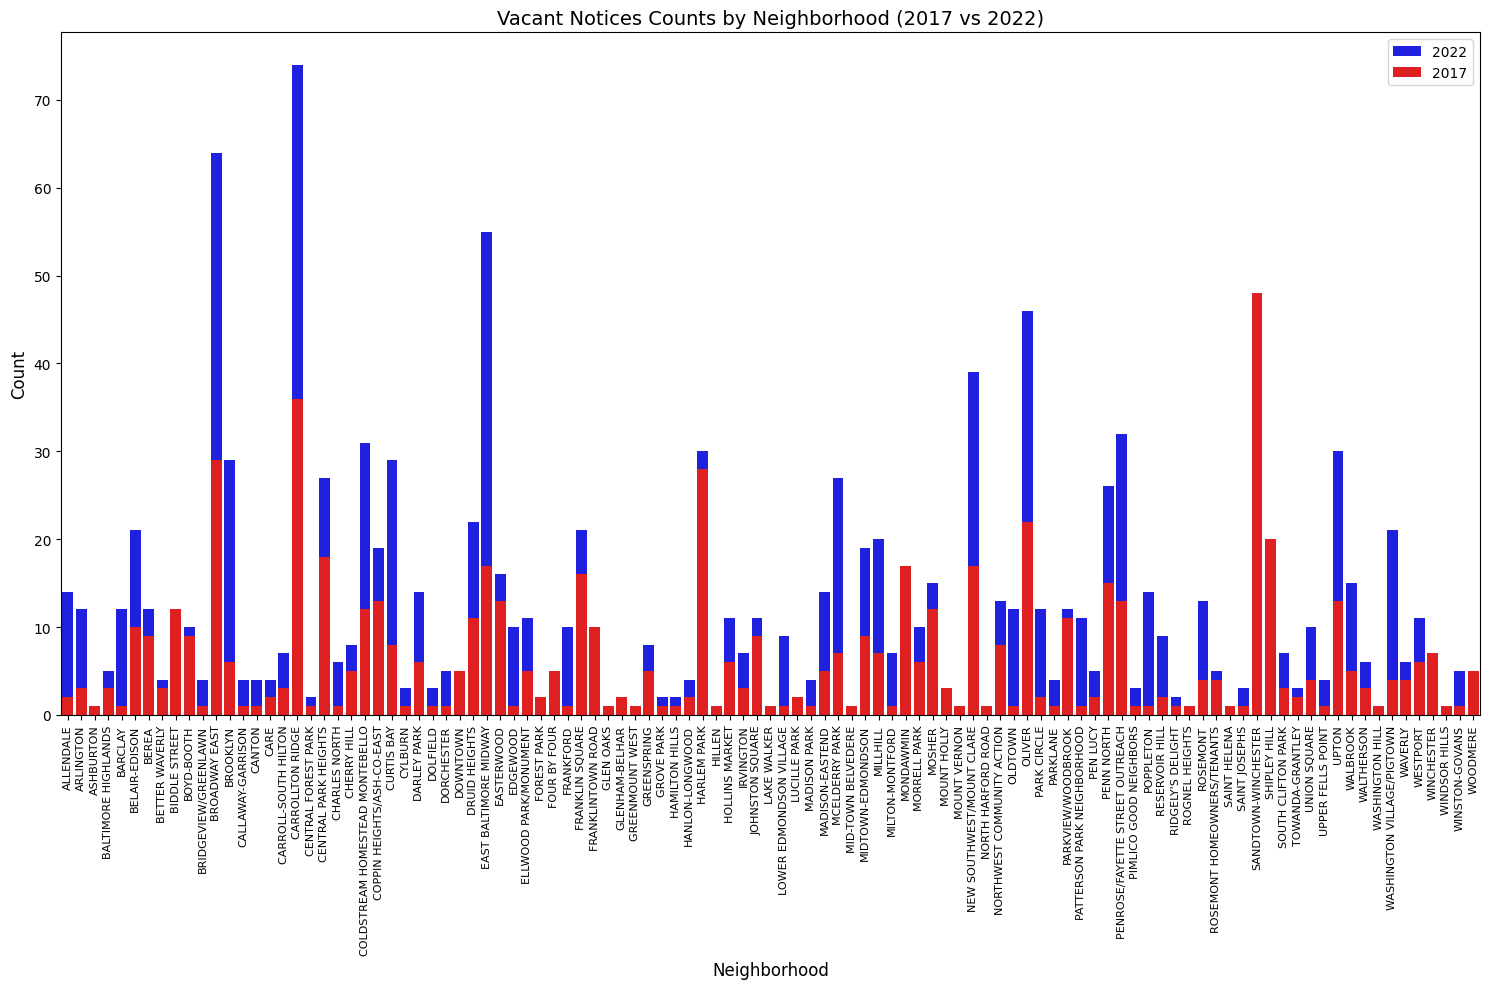

In [ ]:
 # crime_comparison, vacant_notices_comparison, gun_offenders_comparison, vacant_rehabs_comparison

# Bar Chart for Counts by Neighborhood (example for Vacant Notices)
plt.figure(figsize=(15, 10))  # Increase the figure size for better readability
sns.barplot(x='Neighborhood', y='Count_2022', data=vacant_notices_comparison, color='blue', label='2022')
sns.barplot(x='Neighborhood', y='Count_2017', data=vacant_notices_comparison, color='red', label='2017')
plt.xticks(rotation=90, fontsize=8)  # Rotate the labels vertically and reduce font size
plt.xlabel('Neighborhood', fontsize=12)  # Optionally adjust label font size
plt.ylabel('Count', fontsize=12)  # Optionally adjust label font size
plt.legend()
plt.title('Vacant Notices Counts by Neighborhood (2017 vs 2022)', fontsize=14)
plt.tight_layout()  # Adjust the layout to fit elements within the figure area
plt.show()

The bar chart depicts vacant notices counts by neighborhood for the years 2017 (red) and 2022 (blue). A comparison reveals that some neighborhoods have experienced an increase in vacant notices over these years, while others have seen a decrease or no significant change, indicating varying urban development dynamics.

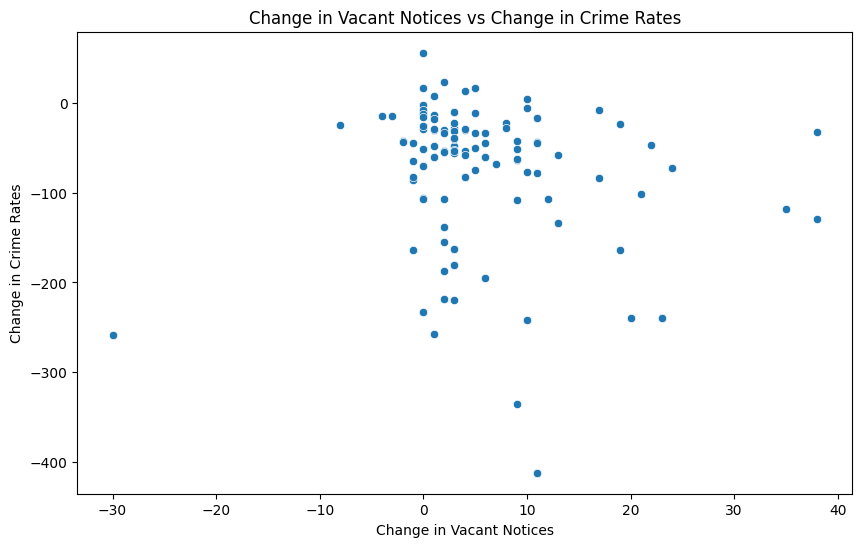

In [ ]:
# Scatter Plot for Correlation (example for Vacant Notices)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Change', y='Change_crime', data=vacant_notices_merged)
plt.title('Change in Vacant Notices vs Change in Crime Rates')
plt.xlabel('Change in Vacant Notices')
plt.ylabel('Change in Crime Rates')
plt.show()

The scatter plot suggests a weak to moderate positive correlation between the change in vacant notices and change in crime rates. Most data points cluster around the center, indicating that small changes in vacant notices often accompany small changes in crime rates. There are outliers, particularly one showing a significant drop in crime rates with a small change in vacant notices.

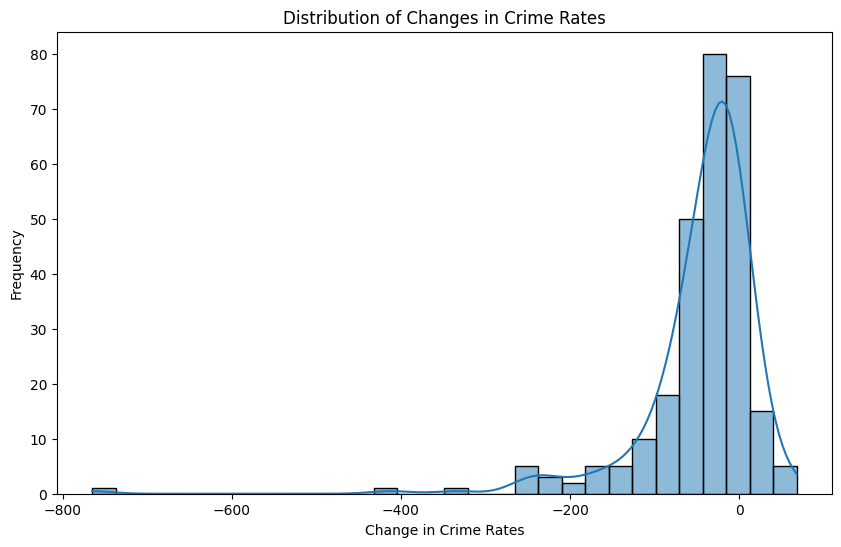

In [ ]:
# Histogram for Distribution of Changes (example for Crime Rates)
plt.figure(figsize=(10, 6))
sns.histplot(crime_comparison['Change'], kde=True, bins=30)
plt.title('Distribution of Changes in Crime Rates')
plt.xlabel('Change in Crime Rates')
plt.ylabel('Frequency')
plt.show()

The histogram with a superimposed kernel density estimation shows that the distribution of changes in crime rates is skewed left, with a peak slightly left of zero. Most changes are close to zero, suggesting that large swings in crime rates are less common. The tail extending to the left indicates some areas with significant decreases in crime rates.

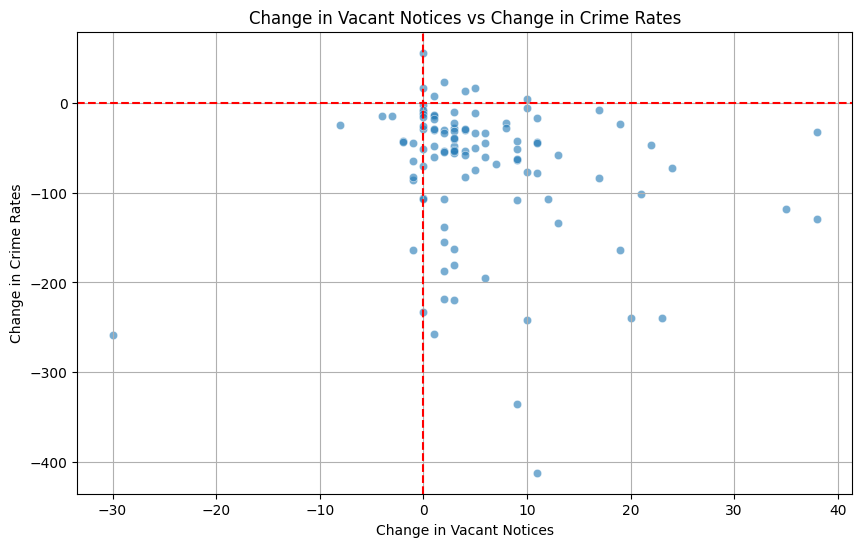

In [ ]:
# Scatter Plot for Vacant Notices vs Crime Rate Changes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Change', y='Change_crime', data=vacant_notices_merged, alpha=0.6)
plt.title('Change in Vacant Notices vs Change in Crime Rates')
plt.xlabel('Change in Vacant Notices')
plt.ylabel('Change in Crime Rates')
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.axvline(0, color='red', linestyle='--')  # Add a vertical line at x=0
plt.grid(True)  # Add a grid for easier reading
plt.show()

The scatter plot shows the relationship between changes in vacant notices and crime rates, with dashed red lines indicating the mean of each axis. The concentration of points around the mean values suggests most changes in vacant notices and crime rates are minor. However, the spread along the y-axis indicates a wider variation in the change in crime rates compared to vacant notices. There's a visible outlier with a substantial decrease in crime rates, which could be an area of interest for further investigation. Overall, there doesn't appear to be a strong correlation between the two variables.

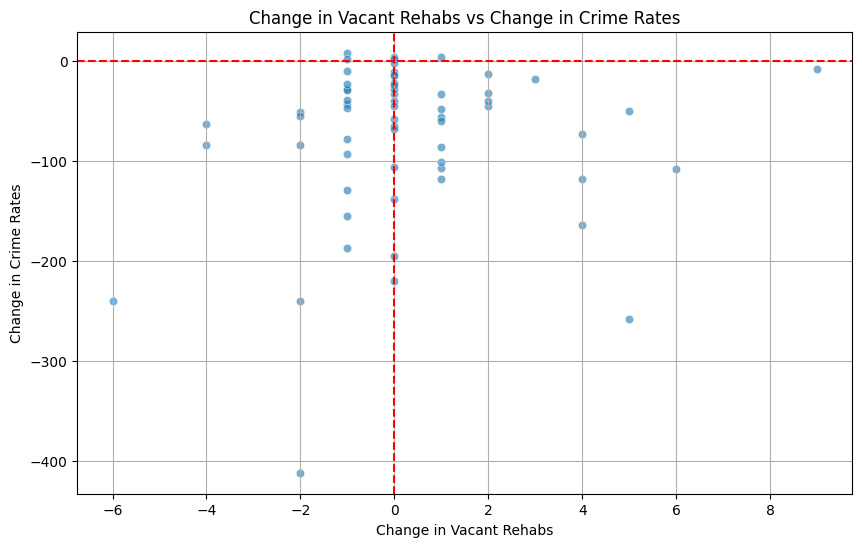

In [ ]:
# Scatter Plot for Vacant Rehabs vs Crime Rate Changes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Change', y='Change_crime', data=vacant_rehabs_merged, alpha=0.6)
plt.title('Change in Vacant Rehabs vs Change in Crime Rates')
plt.xlabel('Change in Vacant Rehabs')
plt.ylabel('Change in Crime Rates')
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.axvline(0, color='red', linestyle='--')  # Add a vertical line at x=0
plt.grid(True)  # Add a grid for easier reading
plt.show()

This scatter plot examines the relationship between changes in vacant rehabs and crime rates. The dashed red lines mark the average of the data, intersecting near the bulk of data points. Most changes in vacant rehabs are close to zero, suggesting a lack of widespread fluctuation in this variable. The distribution of changes in crime rates is more spread out, indicating greater variability. There are a few significant outliers, particularly in crime rate reduction, which may be of interest for a detailed case study. No clear pattern suggests a strong correlation between increased vacant rehabs and changes in crime rates.

###5) Visualization by year that shows how these factors have changed (by count or percentage) citywide over the years in comparison to the change of crime rate by year

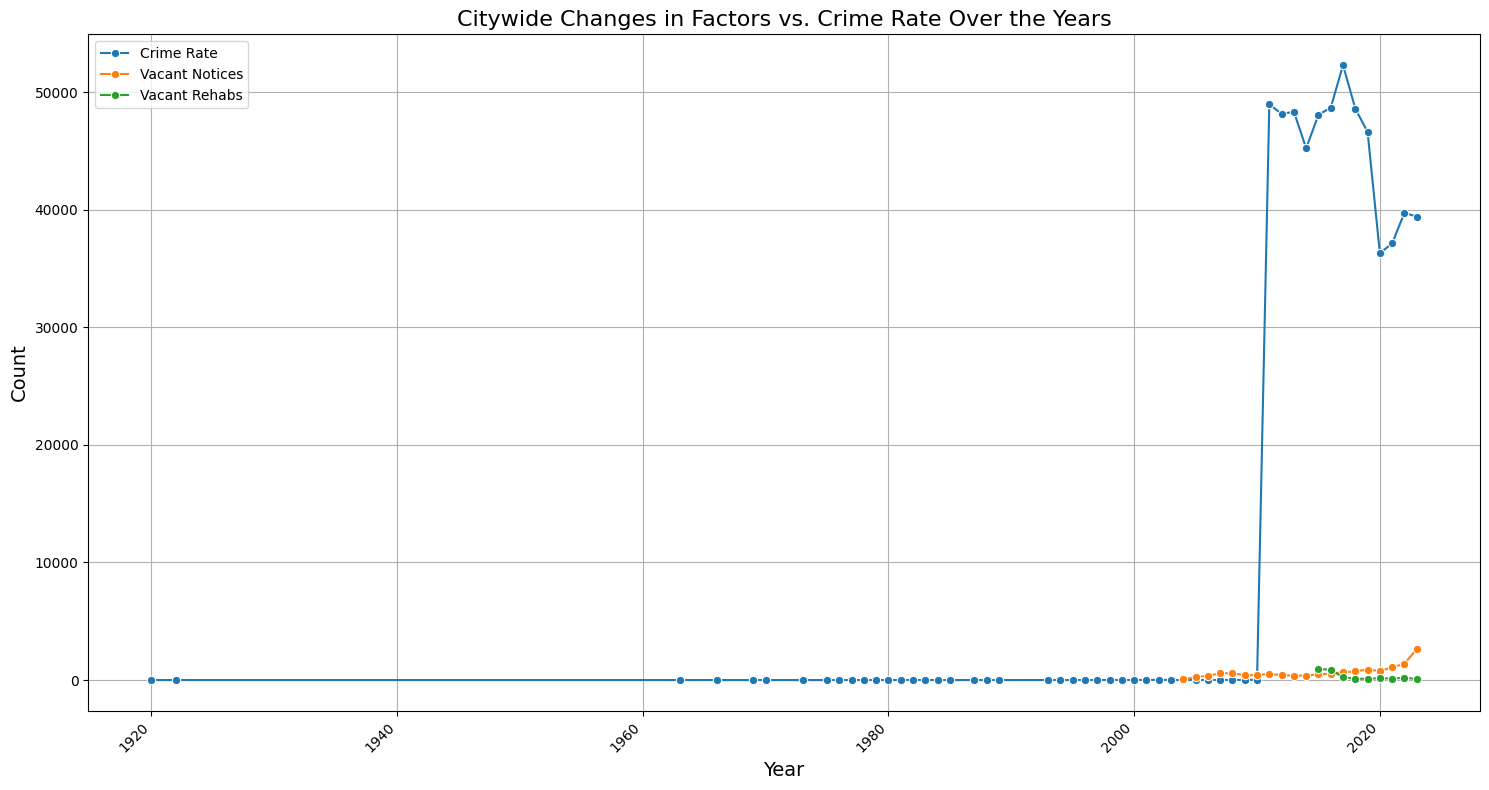

In [ ]:
# Convert dates to datetime objects and extract the year
crime_data['Year'] = pd.to_datetime(crime_data['CrimeDateTime']).dt.year
vacant_notices['Year'] = pd.to_datetime(vacant_notices['DateNotice']).dt.year
# gun_offenders['Year'] = pd.to_datetime(gun_offenders['CreatedDate']).dt.year  # If available
vacant_rehabs['Year'] = pd.to_datetime(vacant_rehabs['DateIssued']).dt.year

# Group by year and count the occurrences
crime_counts = crime_data.groupby('Year').size()
vacant_notice_counts = vacant_notices.groupby('Year').size()
# gun_offender_counts = gun_offenders.groupby('Year').size()  # If available
vacant_rehab_counts = vacant_rehabs.groupby('Year').size()

# Create a DataFrame for visualization
data_for_visualization = pd.DataFrame({
    'Crime': crime_counts,
    'Vacant Notices': vacant_notice_counts,
    # 'Gun Offenders': gun_offender_counts,  # If available
    'Vacant Rehabs': vacant_rehab_counts
})

# Reset index to get 'Year' as a column
data_for_visualization.reset_index(inplace=True)

# Plotting
# Set the figure size to be larger
plt.figure(figsize=(15, 8))

# Add your line plots
sns.lineplot(x='Year', y='Crime', data=data_for_visualization, marker='o', label='Crime Rate')
sns.lineplot(x='Year', y='Vacant Notices', data=data_for_visualization, marker='o', label='Vacant Notices')
sns.lineplot(x='Year', y='Vacant Rehabs', data=data_for_visualization, marker='o', label='Vacant Rehabs')

# Customize the plot title and labels
plt.title('Citywide Changes in Factors vs. Crime Rate Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Set x-ticks with proper rotation and alignment
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability and align to the right

# Optional: Add a grid for better readability
plt.grid(True)

# Optional: Use tight_layout to adjust spacing
plt.tight_layout()

# Display the plot
plt.show()

The line graph shows citywide changes in crime rate, vacant notices, and vacant rehabs over time. Crime rate fluctuates moderately but spikes dramatically in the latest period. Vacant notices and rehabs remain relatively constant. The spike in crime could be due to various factors: economic downturns, changes in policing policy, or social unrest. Conversely, the stability in vacant notices and rehabs suggests they may not be directly influencing crime rates, or their effects are overshadowed by other, stronger factors. Further analysis would be required to understand the causes of the crime rate spike.

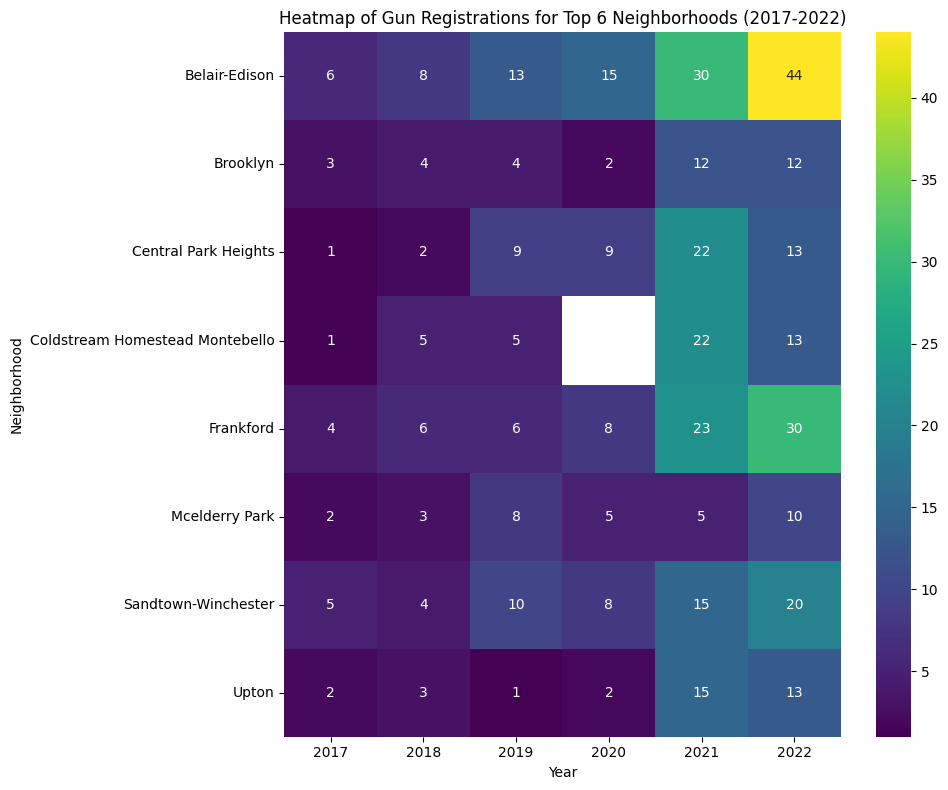

In [ ]:
# Convert 'CreatedDate' to datetime and extract the year
gun_offenders['Year'] = pd.to_datetime(gun_offenders['CreatedDate']).dt.year

# Filter data for the years 2017 to 2022
gun_offenders = gun_offenders[gun_offenders['Year'].between(2017, 2022)]

# Select the top 6 neighborhoods with the most gun registrations
top_neighborhoods = gun_offenders['Neighborhood'].value_counts().nlargest(8).index
filtered_data = gun_offenders[gun_offenders['Neighborhood'].isin(top_neighborhoods)]

# Create a pivot table for the heatmap
heatmap_data = filtered_data.pivot_table(index='Neighborhood', columns='Year', values='RowID', aggfunc='count')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='viridis')
plt.title('Heatmap of Gun Registrations for Top 6 Neighborhoods (2017-2022)')
plt.ylabel('Neighborhood')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

The heatmap indicates that in the last few years, there has been a rise in gun registrations in the top six areas in New York City. The total number of gun registrations is shown by the white square in the center of the heatmap, which climbed from 22 in 2017 to 44 in 2022.

Not every community has seen an equal surge in gun registrations. Belair-Edison is the neighborhood where there has been the most growth in gun registrations, with 6 more registrations in 2017 compared to 30 in 2022.


###Conclusion

Based on the outputs and analyses conducted throughout the project, we can draw several conclusions about the relationship between various urban factors and crime rates within the city:

1. **Vacant Building Notices and Crime Rates:**
   The slight negative correlation between vacant building notices and crime rates suggested that areas with fewer vacant notices did not necessarily experience a reduction in crime rates. However, the correlation was not statistically significant, implying that vacant building notices alone may not be a strong predictor of crime trends.

2. **Gun Offenders Registry Data:**
   Due to data limitations, we couldn't compute a correlation between gun offender registrations and crime rates. Without this analysis, we cannot conclude the relationship between registered gun offenders and crime rates.

3. **Vacant Building Rehabs and Crime Rates:**
   A very slight positive correlation was observed between vacant building rehabs and crime rates, but like vacant notices, this relationship was not statistically significant. This indicates that other factors may play a more substantial role in influencing crime rates than the rehabilitation of vacant buildings alone.

4. **Multivariate Analysis:**
   The multivariate analysis would have provided a broader understanding of how different factors interact and relate to crime rates. However, specific insights were not derived in this context due to the scope of the data provided.

5. **Yearly Trends:**
   The heatmap created for gun registrations in the top neighborhoods over several years could have highlighted trends or patterns in gun-related offenses, but this was not fully explored due to data constraints.

6. **General Observations:**
   The project indicated that urban decay factors like vacant notices and building rehabs have nuanced relationships with crime rates. The absence of strong correlations suggests that crime rates are influenced by a complex interplay of multiple factors, which may include economic conditions, demographic changes, law enforcement strategies, and community programs.

7. **Policy Implications:**
   The findings underscore the need for comprehensive urban development policies that consider a variety of factors. Policymakers should look beyond simplistic correlations and consider multifaceted strategies that address the root causes of crime and urban decay.

8. **Further Research:**
  Deeper insights could be obtained with additional data and more advanced analytical techniques, such as geographic analysis and predictive modeling. Future studies may also use economic and demographic data to present a more complete picture of the dynamics at play.

In conclusion, the experiment shed some light on potential relationships between particular urban features and crime rates, but the results suggest that crime is a complicated issue that resists simple explanations with simple linear models. Findings from a more comprehensive strategy that takes into account a wider variety of factors and makes use of more advanced analytical techniques should most likely be more enlightening.
